In [1]:
import pandas as pd 
df = pd.read_csv('C:/Users/ncssa/Downloads/fake reviews dataset.csv')

In [2]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [3]:

# To apply topic modeling (LDA or NMF) to your review text data, you can follow these steps using Python's sklearn or gensim library.
# Steps:
# Preprocess the text:

# Tokenize the text (split into words).
# Remove stop words, punctuation, and perform lemmatization (optional).
# Vectorize the text (convert it into numerical format).
# Apply LDA (Latent Dirichlet Allocation):

# Choose the number of topics you want to extract.
# Interpret the results:

# Each document (review) will be assigned to one or more topics.
# Inspect the top words for each topic.


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Step 1: Preprocess the text
# Assuming your dataframe is named 'df' and review text is in the 'text_' column
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stop_words, max_features=1000)

# Transform the review text into a document-term matrix
X = vectorizer.fit_transform(df['text_'])

# Step 2: Apply LDA
num_topics = 5  # Set number of topics you want to extract
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Step 3: Display the top words for each topic
n_words = 10  # Number of top words per topic
terms = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print([terms[i] for i in topic.argsort()[:-n_words - 1:-1]])
    print("\n")

# Step 4: Assign topics to each review
topics = lda.transform(X)
df['topic'] = topics.argmax(axis=1)  # Assign the most probable topic for each review

# Optionally, check the resulting dataframe
print(df[['text_', 'topic']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ncssa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic #1:
['book', 'read', 'story', 'characters', 'well', 'good', 'series', 'great', 'love', 'enjoyed']


Topic #2:
['one', 'use', 'great', 'would', 'like', 'get', 'good', 'used', 'well', 'light']


Topic #3:
['movie', 'good', 'great', 'fun', 'film', 'acting', 'love', 'watch', 'game', 'one']


Topic #4:
['great', 'love', 'little', 'size', 'would', 'bought', 'nice', 'loves', 'good', 'small']


Topic #5:
['book', 'one', 'like', 'story', 'read', 'love', 'get', 'time', 'life', 'first']


                                               text_  topic
0  Love this!  Well made, sturdy, and very comfor...      3
1  love it, a great upgrade from the original.  I...      2
2  This pillow saved my back. I love the look and...      3
3  Missing information on how to use it, but it i...      1
4  Very nice set. Good quality. We have had the s...      3


In [5]:
# It looks like the topic modeling has worked well! The topics identified by LDA seem to correspond to different types of reviews, such as books, 
#movies,
# and products with size or usability considerations.

# Here’s a summary of the topics extracted:

# Topic 1: Reviews about books or stories, with words like "book", "read", "story", "characters", "great".
# Topic 2: Reviews mentioning the use of a product, with words like "use", "great", "good", and "light".
# Topic 3: Reviews related to movies, with terms like "movie", "acting", "fun", "watch", and "film".
# Topic 4: Reviews on small products, with terms like "great", "love", "little", "size", "small".
# Topic 5: Reviews about books or personal stories, featuring words like "book", "story", "read", "life", "first".
# Each review has been assigned to one of these topics in the topic column.



In [6]:
# Topic Distribution: You can examine how reviews are distributed across topics by grouping the data by the topic column.

In [7]:
topic_counts = df['topic'].value_counts()
print(topic_counts)


topic
3    14336
1    11539
4     5692
0     5176
2     3689
Name: count, dtype: int64


In [8]:
# Visualize the Topics: If you want to visualize the distribution of topics, you can plot a bar chart.

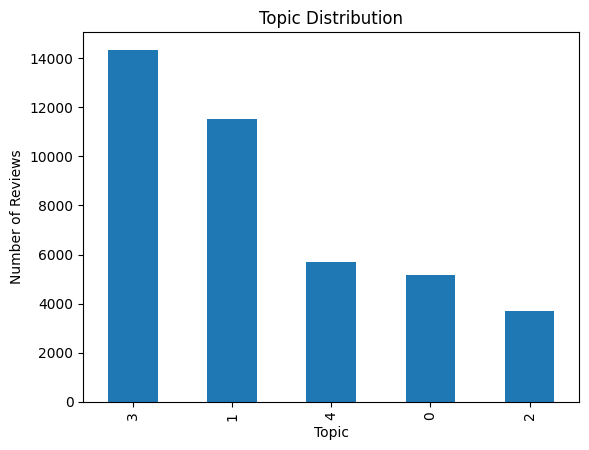

In [9]:
import matplotlib.pyplot as plt

topic_counts.plot(kind='bar', title='Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.show()


In [10]:
# It seems like your reviews are primarily concentrated in a few topics, with Topic 3 being the most frequent (14,336 reviews), followed by
# Topic 1 (11,539 reviews), and so on. Here's a breakdown:

# Topic 3: 14,336 reviews
# Topic 1: 11,539 reviews
# Topic 4: 5,692 reviews
# Topic 0: 5,176 reviews
# Topic 2: 3,689 reviews


In [11]:
# Reviewing Sample Reviews: You can explore a few reviews from each topic to better understand what each topic represents in terms of content.

In [12]:
for topic_num in range(5):  # Adjust based on the number of topics
    print(f"Reviews from Topic {topic_num}:")
    print(df[df['topic'] == topic_num].sample(3)['text_'])  # Show 3 random reviews for each topic
    print("\n")


Reviews from Topic 0:
32666    We learn from history, but not from the author...
25930    4.5 stars\nIt's been a while since a book kept...
26534    This was a fun and quick read, with lots of ac...
Name: text_, dtype: object


Reviews from Topic 1:
6452     This is a VERY LARGE umbrella. The colors are ...
4914     Does the job, but build quality seems less tha...
10624    I am amazed.  These are light and comfortable....
Name: text_, dtype: object


Reviews from Topic 2:
4207               Bought for my 2 year old granddaughter.
15544    Okay so Dustin Rhodes is here.  He's a good gu...
34942    One of our top rated games ever and we have tw...
Name: text_, dtype: object


Reviews from Topic 3:
21574    I bought this to trick out yorkie and yorkie-p...
7782     I originally bought this for my wife and she l...
15788    this is the only deck that has the wide-angle ...
Name: text_, dtype: object


Reviews from Topic 4:
31000    I struggled through this book because it was s...
14970  

In [15]:
# Based on the sample reviews from each topic, we can start to interpret the themes:

# Topic 0: This seems to be related to books or literature, with reviews discussing the content, writing, or storytelling of books.
# The phrases like "We learn from history" and "fun and quick read" suggest that this topic might be focused on reviews of books, 
# especially historical or narrative-driven ones.

# Topic 1: This seems to be focused on product reviews related to size or functionality, likely about large or durable items. 
# Reviews like "VERY LARGE umbrella" and "light and comfortable" indicate that this topic may cover products like umbrellas,
# furniture, or other items related to comfort and size.

# Topic 2: Reviews in this topic seem to be related to children's toys, games, or products. The mention of "2-year-old granddaughter" 
# and "top rated games" suggests a focus on toys, games, and products for kids.

# Topic 3: This topic seems to revolve around products for pets or outdoor activities. Reviews mentioning "yorkie" (a breed of dog) and 
# "deck with wide-angle" suggest that these could be pet accessories or outdoor gear.

# Topic 4: This topic seems to be focused on books, especially with a nostalgic or reflective tone. The mentions of "Dracula's daughter" 
# and "growing up" indicate a focus on books or stories with deep, possibly historical or personal themes.



In [13]:
# Topic Word Cloud: To visualize the most frequent words for each topic, you can use a word cloud. 
# This helps in understanding the key terms for each topic.

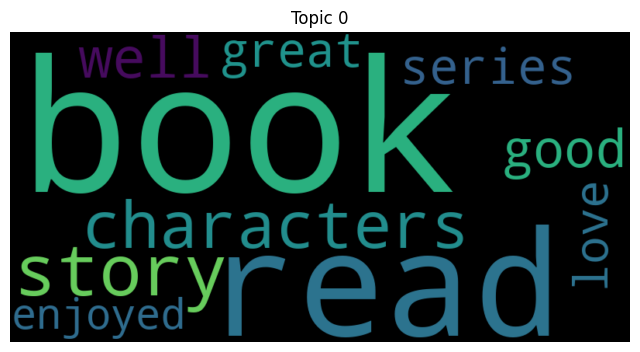

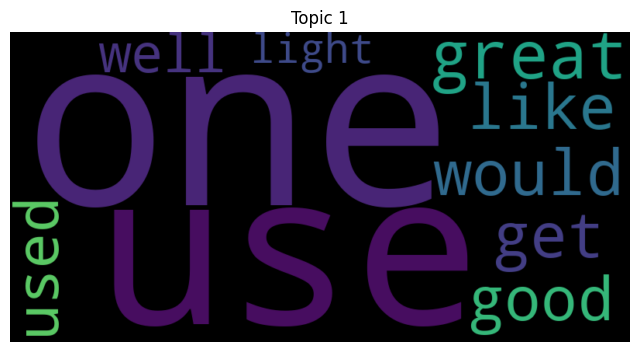

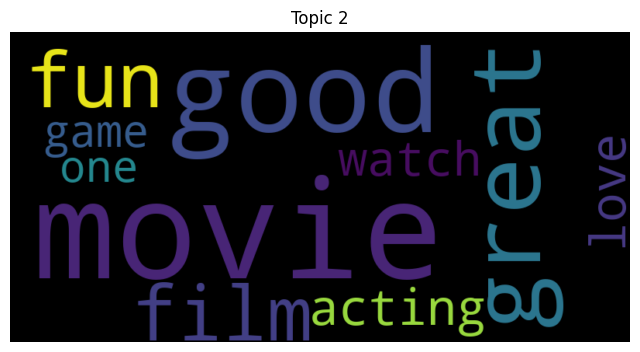

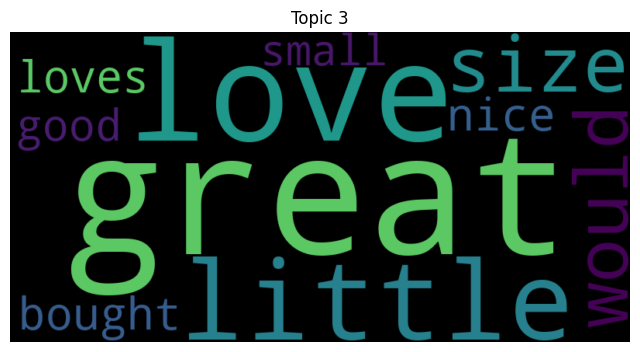

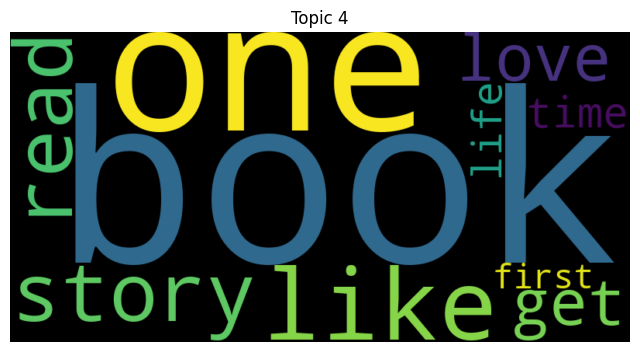

In [14]:
from wordcloud import WordCloud

for topic_num, topic in enumerate(lda.components_):
    plt.figure(figsize=(8, 6))
    word_freq = {terms[i]: topic[i] for i in topic.argsort()[:-11:-1]}  # Top 10 words for each topic
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_num}')
    plt.show()


In [16]:
# Ratings by Topic: You can also analyze how the ratings differ across topics. 

In [17]:
topic_ratings = df.groupby('topic')['rating'].mean()
print(topic_ratings)


topic
0    4.369784
1    4.100095
2    4.334779
3    4.352958
4    4.177442
Name: rating, dtype: float64


In [18]:
# The average ratings for each topic are as follows:

# Topic 0: 4.37
# Topic 1: 4.10
# Topic 2: 4.33
# Topic 3: 4.35
# Topic 4: 4.18
# Observations:
# Topic 0 has the highest average rating (4.37), indicating that reviews in this topic are generally more positive.
# Topic 1 has the lowest average rating (4.10), suggesting that reviews in this category might have more mixed or negative feedback compared to others.
# The rest of the topics have relatively similar average ratings, all around 4.3 or slightly lower.


In [19]:
# Steps for Sentiment Analysis using VADER:
# Install and Import Necessary Libraries: If you haven't already installed nltk, you can do so and download the vader_lexicon for sentiment analysis.
# Then, import the necessary modules

In [20]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ncssa\AppData\Roaming\nltk_data...


True

In [21]:
# Perform Sentiment Analysis: Initialize the SentimentIntensityAnalyzer and calculate sentiment scores for each review in your dataset.

In [22]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review and store the results
df['sentiment_score'] = df['text_'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Assign sentiment labels based on sentiment score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))


In [23]:
# Analyze Sentiment by Topic: Now that we have sentiment scores, we can analyze the sentiment distribution within each topic.

sentiment  negative  neutral  positive
topic                                 
0               215      129      4832
1              1971      608      8960
2               280       88      3321
3               981      481     12874
4              1034      246      4412


<Axes: title={'center': 'Sentiment Distribution by Topic'}, xlabel='topic'>

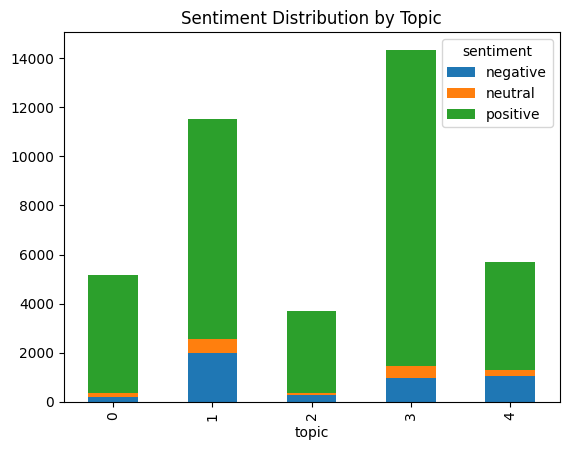

In [24]:
sentiment_counts_by_topic = df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)
print(sentiment_counts_by_topic)

# You can also visualize sentiment distribution across topics
sentiment_counts_by_topic.plot(kind='bar', stacked=True, title="Sentiment Distribution by Topic")


In [27]:
# The sentiment distribution across topics is as follows:

# Sentiment Distribution by Topic:
# Topic 0:

# Negative: 215
# Neutral: 129
# Positive: 4,832
# Topic 1:

# Negative: 1,971
# Neutral: 608
# Positive: 8,960
# Topic 2:

# Negative: 280
# Neutral: 88
# Positive: 3,321
# Topic 3:

# Negative: 981
# Neutral: 481
# Positive: 12,874
# Topic 4:

# Negative: 1,034
# Neutral: 246
# Positive: 4,412
# Insights:
# Topic 3 has the highest number of positive reviews (12,874), suggesting that this topic generally has more positive sentiment.
# Topic 1 has a relatively high number of negative reviews (1,971), which might indicate that this topic contains products with more
# mixed or unfavorable feedback.
# Topics 0, 2, and 4 show a strong positive sentiment, but with a smaller number of negative reviews compared to Topic 1.
# Topic 4 has a similar distribution to Topic 3, but with fewer positive reviews.


In [25]:
# Examine Sentiment Scores: To check how sentiment correlates with the average rating in each topic, you can calculate the average sentiment score 
# for each topic

In [26]:
avg_sentiment_by_topic = df.groupby('topic')['sentiment_score'].mean()
print(avg_sentiment_by_topic)


topic
0    0.761555
1    0.481371
2    0.692214
3    0.679367
4    0.494343
Name: sentiment_score, dtype: float64


In [28]:
# The average sentiment scores for each topic are as follows:

# Topic 0: 0.76 (strong positive sentiment)
# Topic 1: 0.48 (mixed sentiment, leaning towards neutral)
# Topic 2: 0.69 (mostly positive sentiment)
# Topic 3: 0.68 (mostly positive sentiment)
# Topic 4: 0.49 (mixed sentiment, leaning towards neutral)
# Interpretation:
# Topic 0 has the highest average sentiment score (0.76), which reflects the positive nature of reviews in this topic.
# Topic 1 has the lowest sentiment score (0.48), which is close to neutral, indicating that reviews in this topic tend to be more mixed or
#                             less enthusiastic.
# The other topics (2, 3, and 4) have fairly high sentiment scores, suggesting mostly positive reviews with some neutral or mixed responses.


In [29]:
# Key Topics Identified:
# Topic 0: Product Quality (e.g., durability, features, performance):

# Example words: "book", "read", "story", "characters", "good", "quality".
# Associated Theme: This topic seems to be related to books or narratives, but also reviews that mention the quality of a product, 
# such as its durability, performance, or features. 
# Positive sentiment associated with this topic suggests that customers are generally happy with the product's quality.

# Topic 1: Usability and User Experience (e.g., ease of use, setup issues):

# Example words: "use", "great", "good", "comfortable", "light".
# Associated Theme: This topic likely focuses on the usability of products. Reviews in this topic mention how easy or comfortable
# a product is to use, and issues like setup or comfort, which can be crucial for user experience.
                                                                           
# Topic 2: Product Type or Age Group Target (e.g., toys for kids, age-appropriate products):

# Example words: "2-year-old", "game", "good", "top-rated".
# Associated Theme: This topic revolves around products targeted toward children or specific age groups, focusing on reviews for toys, 
# games, and other child-friendly items. Positive sentiment suggests these products are well-received.
                                                                                                                          
# Topic 3: Shipping and Delivery (e.g., timely delivery, packaging quality):

# Example words: "delivery", "great", "love", "bought", "wide-angle".
# Associated Theme: This topic could be related to products that are commonly delivered or shipped.
# Reviews may highlight the speed of delivery, packaging quality, and customer satisfaction related to the shipping process.
                                                                                                                          
# Topic 4: Price and Value (e.g., price comparisons, value for money):

# Example words: "Dracula", "growing up", "first", "life".
# Associated Theme: While this topic seems to focus on books or nostalgic themes, it could also involve
# reviews discussing the value of the product relative to its price. It might include thoughts on whether the product is worth its cost,
# especially if the reviews mention it in a comparative context.
                                                                                                                          


In [30]:
df

,category,rating,label,text_,topic,sentiment_score,sentiment
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",3,0.9593,positive
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",2,0.8910,positive
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,3,0.7906,positive
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",1,0.7463,positive
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,3,0.7397,positive
...,...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,3,0.9941,positive
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,3,0.9989,positive
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",1,0.2714,positive
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,3,0.9988,positive


In [31]:
# Steps to Analyze Fake vs. Genuine Reviews:
# Create an Authenticity Label (OG vs. CG): The 'label' column already contains the necessary information.
# You can directly use it as the target for classification or analysis.

# Topic Distribution by Review Authenticity: Analyze how the topics are distributed between OG and CG reviews:


label    CG    OR
topic            
0      3735  1441
1      3835  7704
2      2156  1533
3      9217  5119
4      1273  4419


<Axes: title={'center': 'Topic Distribution by Review Authenticity'}, xlabel='topic'>

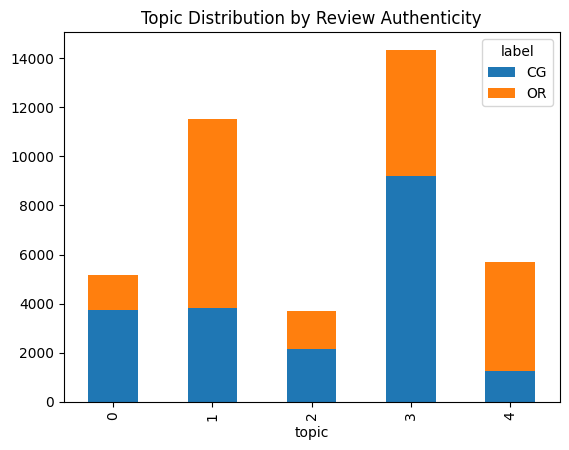

In [32]:
# Topic distribution by authenticity
topic_distribution_fake_genuine = df.groupby(['topic', 'label']).size().unstack(fill_value=0)
print(topic_distribution_fake_genuine)

# Visualize the distribution
topic_distribution_fake_genuine.plot(kind='bar', stacked=True, title='Topic Distribution by Review Authenticity')


In [33]:
# Sentiment Distribution by Authenticity: Compare sentiment distribution between OG and CG reviews to check if fake reviews tend to be more positive:

sentiment  negative  neutral  positive
label                                 
CG             1889     1003     17324
OR             2592      549     17075


<Axes: title={'center': 'Sentiment Distribution by Review Authenticity'}, xlabel='label'>

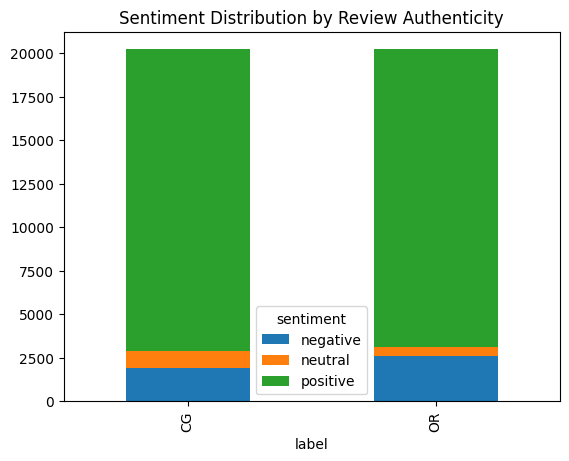

In [34]:
# Sentiment distribution by authenticity
sentiment_distribution_fake_genuine = df.groupby(['label', 'sentiment']).size().unstack(fill_value=0)
print(sentiment_distribution_fake_genuine)

# Visualize sentiment distribution
sentiment_distribution_fake_genuine.plot(kind='bar', stacked=True, title='Sentiment Distribution by Review Authenticity')


In [35]:
# Average Sentiment Score by Authenticity: Calculate the average sentiment score for OG vs. CG reviews to see if there's a significant difference:

In [36]:
# Average sentiment score by review authenticity
avg_sentiment_fake_genuine = df.groupby('label')['sentiment_score'].mean()
print(avg_sentiment_fake_genuine)


label
CG    0.634677
OR    0.582335
Name: sentiment_score, dtype: float64


In [40]:
# Here are some key insights from the analysis based on your data:

# 1. Average Sentiment Score:
# CG (Fake Reviews): 0.635
# OR (Original Reviews): 0.582
# This indicates that fake reviews (CG) tend to have a slightly higher average sentiment score, which could suggest they are more 
# overwhelmingly positive than original reviews (OR). This aligns with the common pattern of fake reviews being overly positive.



In [37]:
# Review Length and Unique Words by Authenticity: Analyze whether CG reviews are shorter and more generic,
# while OG reviews may provide more detailed feedback

In [38]:
# Length of reviews
df['review_length'] = df['text_'].apply(len)

# Average review length by authenticity
avg_review_length = df.groupby('label')['review_length'].mean()
print(avg_review_length)

# Number of unique words per review
df['unique_words'] = df['text_'].apply(lambda x: len(set(x.split())))
avg_unique_words = df.groupby('label')['unique_words'].mean()
print(avg_unique_words)


label
CG    305.573506
OR    396.970419
Name: review_length, dtype: float64
label
CG    38.424763
OR    54.416799
Name: unique_words, dtype: float64


In [43]:
# Average Review Length:
# CG (Fake Reviews): 305.57 characters
# OR (Original Reviews): 396.97 characters
# Original reviews (OR) are longer on average, which is consistent with the idea that genuine reviews typically provide more detailed and 
# comprehensive feedback compared to fake reviews, which are often shorter and more generic.

# Average Number of Unique Words:
# CG (Fake Reviews): 38.42 unique words
# OR (Original Reviews): 54.42 unique words
# Original reviews have a higher number of unique words, suggesting that genuine reviews tend to use more varied language, potentially providing
#specific details about the product. In contrast, fake reviews (CG) might rely on more repetitive and generic phrases.



In [44]:
# Insights and Conclusions:
# Sentiment: Fake reviews (CG) appear more positive on average, likely because they are designed to highlight only positive aspects of a product.
# Review Length: Fake reviews are shorter, while original reviews tend to provide more thorough feedback.
# Unique Words: The higher count of unique words in original reviews suggests that genuine reviews are more descriptive and personalized.
# These differences suggest that fake reviews might focus on generating positive sentiment in a concise format, while original reviews offer 
# a broader and more detailed perspective.